# Paper results


In [1]:
from code import * 
from code import advection_diffusion_inference_utils
import sys
sys.modules['advection_diffusion_inference_utils'] =  advection_diffusion_inference_utils
import matplotlib.pyplot as plt
%matplotlib inline

Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7/paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat/outputm1_r_NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip/m1_r_NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip_var.pkl
Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7/paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat/outputm1_r_NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip/m1_r_NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip_var.pkl
Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-

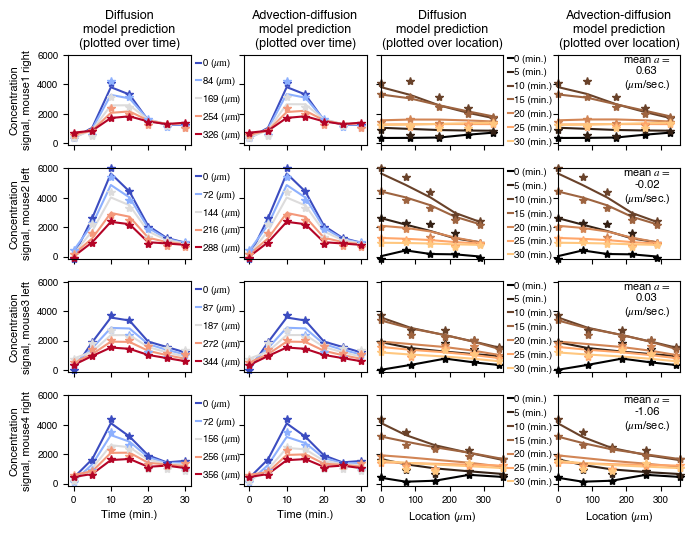

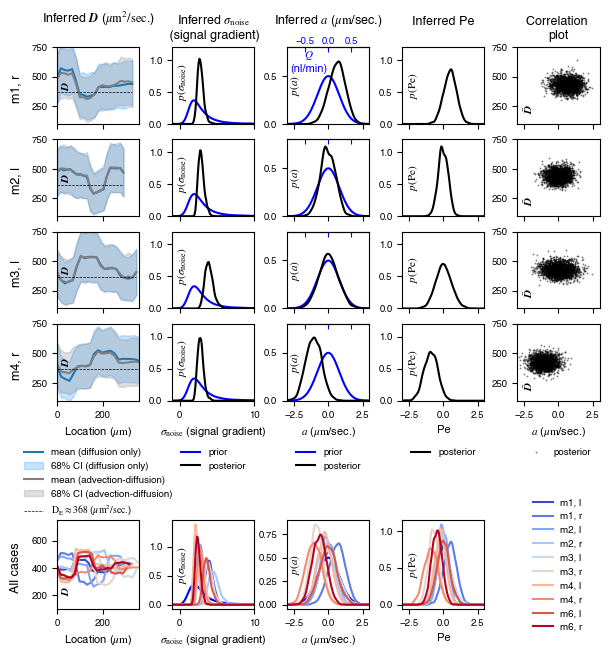

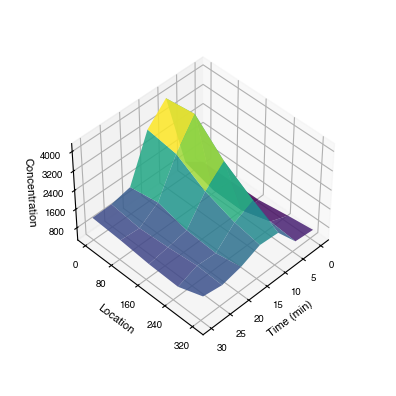

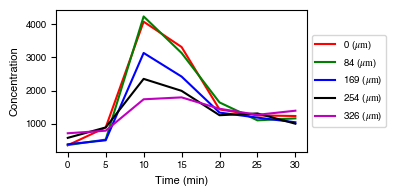

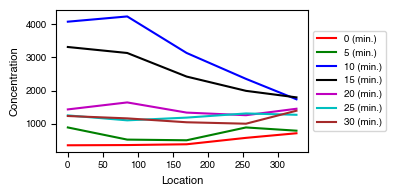

In [2]:
scenarios_dir = [
    "/Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7"
    ]
scenario_tags_list = [
    ["paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat",
     "paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat",
     "NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip",
     "NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip"],

    ]

num_scenarios = len(scenarios_dir)
figs_to_plot = [[1, 2, 3]]*num_scenarios
physics = [['diffusion', 'advection-diffusion']]*num_scenarios

i = 0
animal_ear = [
    ('m1', 'r'),
    ('m2', 'l'),
    ('m3', 'l'),
    ('m4', 'r')
    ]
all_animals_ears = []
for animal in all_animals():
    for ear in all_ears():
        all_animals_ears.append((animal, ear))
data_diff_list, data_adv_list = read_all_scenarios_2(scenarios_dir[i], scenario_tags_list[i], animal_ear)
data_diff_list_all, data_adv_list_all = read_all_scenarios_2(scenarios_dir[i], scenario_tags_list[i], all_animals_ears)

# create directory if it does not exist
import os
os.makedirs('figures/'+scenario_tags_list[i][0], exist_ok=True)
if 1 in figs_to_plot[i]:
        #plot_v3_fig1( data_diff_list, data_adv_list)

        #plt.tight_layout()
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig1.png')
        #plot_v3_fig1_b( data_diff_list, data_adv_list, fig_v='I')
        #plt.tight_layout()
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig1_b_I.png')
        #plot_v3_fig1_b( data_diff_list, data_adv_list, fig_v='II')
        #plt.tight_layout()
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig1_b_II.png')
        #color_map_string = 'cool'
        #plot_v3_fig1_b( data_diff_list, data_adv_list, fig_v='II', plot_type='over_location', colormap=plt.colormaps.get_cmap(color_map_string))
        #plt.tight_layout()
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig1_b_II_location'+color_map_string+'.pdf')
        #plot_v3_fig1_b( data_diff_list, data_adv_list, fig_v='III', plot_type='over_time')
        #plt.tight_layout()
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig1_b_III.png')
        colormaps = [plt.colormaps.get_cmap('coolwarm'),
                     plt.colormaps.get_cmap('copper')]
        plot_v3_fig1_c( data_diff_list, data_adv_list, colormaps=colormaps)
        #plt.tight_layout()
        plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig3_c.pdf', bbox_inches='tight') 
        pass
if 2 in figs_to_plot[i]:
        all_samples_a = plot_v3_fig2_II( data_diff_list, data_adv_list, data_diff_list_all, data_adv_list_all, d_y_coor=0.5)
        # save figure and remove white space
        plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig2.pdf', bbox_inches='tight')
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig2.png')

if 3 in figs_to_plot[i]:
        lines, legend = plot_v3_intro_data( data_diff_list, data_adv_list, plot_type='surface')
        ax = plt.gca()
        ax.view_init(45, 45)
        # update vertical axis to reduce number of ticks
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax.zaxis.set_major_locator(plt.MaxNLocator(5))
        ax.set_box_aspect(aspect=None, zoom=0.75)
        plt.tight_layout()
        plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig3_surface.pdf')


        # plot over time
        lines, legend = plot_v3_intro_data( data_diff_list, data_adv_list, plot_type='over_time')
        # add legend outside the plot
        plt.legend(lines, legend, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout()
        plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig3_over_time.pdf')

        # plot over space
        lines, legend = plot_v3_intro_data( data_diff_list, data_adv_list, plot_type='over_location')
        # add legend outside the plot
        plt.legend(lines, legend, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout()
        plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig3_over_space.pdf')

        # control transparency
        

20020


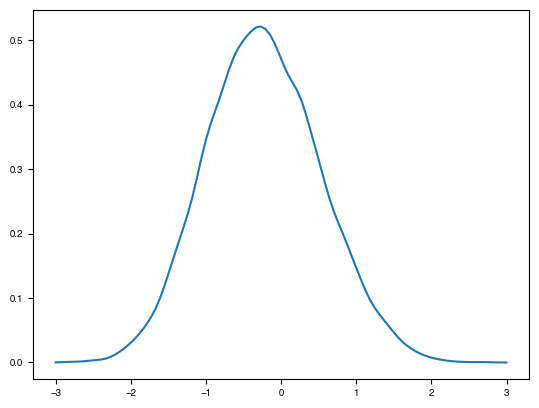

In [3]:
all_samples_a_array = np.array(all_samples_a).flatten()
# plot KDE
fig, ax = plt.subplots(1,1)
from scipy.stats import gaussian_kde
kde = gaussian_kde(all_samples_a_array)
x = np.linspace(-3, 3, 100)
y = kde(x)
ax.plot(x, y)
print(len(all_samples_a_array))
